# Robotic Systems I (ECE-DK808)

## Electrical and Computer Engineering Department, University of Patras Greece

**Instructor:** Konstantinos Chazilygeroudis (costashatz@upatras.gr)

## Lab 1

### Rotation Matrices

Let's talk about **rotation matrices**. The transformation that transforms a vector/point, $\boldsymbol{v}_b$, expressed in *body frame* to the same vector/point, but expressed in the *fixed/world frame* orientation, $\boldsymbol{v}_w$.

$\boldsymbol{v}_w = \boldsymbol{R}_{wb}\boldsymbol{v}_b$

where $\boldsymbol{R_{wb}}\in\mathcal{SO}(3)$ is a **rotation matrix** that rotates the *fixed/world frame* such that it matches the *body frame*. We use this rotation (transformation) matrix to rotate a vector from *body frame* to *world frame*.

If we define $\mathcal{W} = (\boldsymbol{w}_x, \boldsymbol{w}_y, \boldsymbol{w}_z)$ as the world frame, and analogously the body frame as $\mathcal{B}$, then we have:

$\boldsymbol{R}_{wb} = \begin{bmatrix}(\boldsymbol{w}_x\cdot\boldsymbol{b}_x) & (\boldsymbol{w}_x\cdot\boldsymbol{b}_y) &(\boldsymbol{w}_x\cdot\boldsymbol{b}_z)\\(\boldsymbol{w}_y\cdot\boldsymbol{b}_x) & (\boldsymbol{w}_y\cdot\boldsymbol{b}_y) & (\boldsymbol{w}_y\cdot\boldsymbol{b}_z)\\(\boldsymbol{w}_z\cdot\boldsymbol{b}_x) & (\boldsymbol{w}_z\cdot\boldsymbol{b}_y) & (\boldsymbol{w}_z\cdot\boldsymbol{b}_z)\end{bmatrix}$

We can define some elementary rotations:

**Rotation around x-axis**

$\boldsymbol{R}_x(\theta) = \begin{bmatrix}1 & 0 & 0\\0 & \cos\theta & -\sin\theta\\ 0 & \sin\theta & \cos\theta\end{bmatrix}$

**Rotation around y-axis**

$\boldsymbol{R}_y(\theta) = \begin{bmatrix}\cos\theta & 0 & \sin\theta\\0 & 1 & 0\\ -\sin\theta & 0 & \cos\theta\end{bmatrix}$

**Rotation around z-axis**

$\boldsymbol{R}_z(\theta) = \begin{bmatrix}\cos\theta & -\sin\theta & 0\\\sin\theta & \cos\theta & 0\\ 0 & 0 & 1\end{bmatrix}$

Let's create functions for these elementary rotations..

In [1]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting

np.set_printoptions(precision=2, suppress=True)

In [2]:
def RotX(theta):
    ### TO-DO: Implement 3D rotation matrix around x-axis. Save it in a variable named 'R'.
    ### ANSWER: Insert code here
    R = np.array([[1.,            0.,             0.],
                  [0., np.cos(theta), -np.sin(theta)],
                  [0., np.sin(theta),  np.cos(theta)]])
    ### END of ANSWER
    return R

def RotY(theta):
    ### TO-DO: Implement 3D rotation matrix around y-axis. Save it in a variable named 'R'.
    ### ANSWER: Insert code here
    R = np.array([[ np.cos(theta), 0.,  np.sin(theta)],
                  [            0., 1.,             0.],
                  [-np.sin(theta), 0.,  np.cos(theta)]])
    ### END of ANSWER
    return R

def RotZ(theta):
    ### TO-DO: Implement 3D rotation matrix around z-axis. Save it in a variable named 'R'.
    ### ANSWER: Insert code here
    R = np.array([[np.cos(theta), -np.sin(theta), 0.],
                  [np.sin(theta),  np.cos(theta), 0.],
                  [           0.,             0., 1.]])
    ### END of ANSWER
    return R

In [3]:
assert(np.isclose(RotX(0.), np.eye(3)).all())
assert(np.isclose(RotY(0.), np.eye(3)).all())
assert(np.isclose(RotZ(0.), np.eye(3)).all())


Now let's suppose that we have a robotic manipulator whose end-effector can move around its fixed axis. Let's define a trajectory for the end-effector. To start we'll assume that it can move from $[0, 2\\pi]$. Come back to this later and experiment with different angles!

In [4]:
# Generate a trajectory in 3D space (original trajectory)
t = np.linspace(0, 2 * np.pi, 100)
original_trajectory = np.column_stack([np.cos(t), np.sin(t), np.zeros_like(t)]).T

Awesome! Now let's use our create a rotation matrix and use it to transform our trajectory into the new frame.

In [5]:
### TO-DO: Create a rotation matrix that rotates a point first around y-axis by -π radians and then around the x-axis π/3 rads. Save it in a variable named 'R'.
### ANSWER: Insert code here
R = RotX(np.pi/3) @ RotY(-np.pi) @ RotZ(0.)
### END of ANSWER

### TO-DO: Transform the trajectory (original_trajectory). Save it in a variable named 'transformed_trajectory'.
### ANSWER: Insert code here
transformed_trajectory = R @ original_trajectory
### END of ANSWER

Now it's time to plot the two trajectories to see what we have accomplished. Let's start with a function that plots a 3D trajectory. Remember that each axis is represented by a different column in our trajectory matrix.

In [6]:
# Plot the trajectory
def plot_trajectory(ax, trajectory, label):
  ax.plot(trajectory[0, :], trajectory[1, :], trajectory[2, :], label=label)

It would also be really helpful to be able to visualise the two frames (original and tranformed). We can do that by using matplotib's `quiver` function. This will plot each axis as a colored arrow. This way we can plot the unit vectors of each reference frame.

In [7]:
# Plot the frame
def plot_frame(ax, R, origin=np.zeros((3,1))):
    xaxis = R @ np.array([[1., 0., 0.]]).T
    yaxis = R @ np.array([[0., 1., 0.]]).T
    zaxis = R @ np.array([[0., 0., 1.]]).T

    ax.quiver(*origin, *xaxis, color='r', length=0.5)
    ax.quiver(*origin, *yaxis, color='g', length=0.5)
    ax.quiver(*origin, *zaxis, color='b', length=0.5)

Finally we are ready to plot everything! Since our original trajectory is in the xy-plane we'll use use the identity matrix as our original frame and the transformation matrix as the transformed frame.

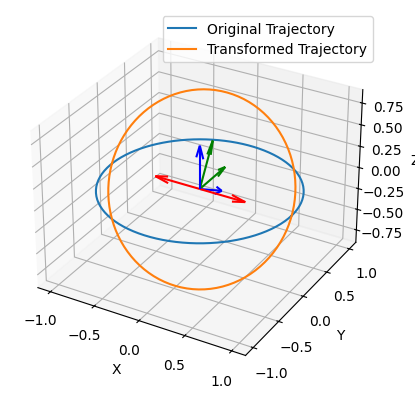

In [8]:
# Plot the original and transformed trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_trajectory(ax, original_trajectory, label='Original Trajectory')
plot_trajectory(ax, transformed_trajectory, label='Transformed Trajectory')

# Plot coordinate frames for both original and transformed frames
plot_frame(ax, np.eye(3))
plot_frame(ax, R)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

Awesome! You can experiment with different trajectories and frames by changing the parameters above.

### Full Transformation Matrices

OK! Now let's do the same with full transformation matrices. We are going to use the **homogeneous coordinates**:

$\boldsymbol{T}_{wb} = \begin{bmatrix}\boldsymbol{R}_{wb} & \boldsymbol{p}_w\\\boldsymbol{0} & 1\end{bmatrix}$

Let's delve into this. First, let's build a function that we give it the rotation matrix and the translation vector and gives us a homogeneous transformation matrix.

In [11]:
def homogeneous(R, p = np.zeros((3, 1))):
    ### TO-DO: Build the homogeneous transformation matrix from R and p. Save it in a variable named 'T'.
    ### ANSWER: Insert code here
    T = np.eye(4)
    T[:3, :3] = R
    T[:3,  3] = p.reshape((1,3))
    ### END of ANSWER

    return T

# Transform point using homegeneous transformation matrix. 'pb' is a 3x1 vector.
def transform_point_homogeneous(T, pb):
    ### ANSWER: Insert code here
    point = np.block([[pb], [np.ones((1, pb.shape[1]))]])
    transformed_point = T @ point
    
    return transformed_point
    ### END of ANSWER

# Transform vector using homegeneous transformation matrix. 'vb' is a 3x1 vector.
def transform_vector_homogeneous(T, vb):
    ### ANSWER: Insert code here
    vector = np.block([[vb], [0.]])
    transformed_vector = T @ vector
    
    return transformed_vector
    ### END of ANSWER

Let's transform now the trajectory using a full transformation matrix:

In [12]:
### TO-DO: Create a rotation matrix that rotates a point first around y-axis by -π radians and then around the x-axis π/3 rads. Save it in a variable named 'R'.
### ANSWER: Insert code here
R = RotX(np.pi/3) @ RotY(-np.pi) @ RotZ(0.)
### END of ANSWER

### TO-DO: Create a translation vector with all ones. Save it in a variable named 't'.
### ANSWER: Insert code here
t = np.array([[1.],
              [1.],
              [1.]])
### END of ANSWER

T = homogeneous(R, t)

### TO-DO: Transform the trajectory (you do not necessarily need to use `transform_point_homogeneous`). Save it in a variable named 'transformed_trajectory' (numpy array).
### ANSWER: Insert code here
transformed_trajectory = transform_point_homogeneous(T, original_trajectory)
### END of ANSWER

pb = [[ 1.    1.    0.99  0.98  0.97  0.95  0.93  0.9   0.87  0.84  0.81  0.77
   0.72  0.68  0.63  0.58  0.53  0.47  0.42  0.36  0.3   0.24  0.17  0.11
   0.05 -0.02 -0.08 -0.14 -0.2  -0.27 -0.33 -0.39 -0.44 -0.5  -0.55 -0.61
  -0.65 -0.7  -0.75 -0.79 -0.82 -0.86 -0.89 -0.92 -0.94 -0.96 -0.98 -0.99
  -1.   -1.   -1.   -1.   -0.99 -0.98 -0.96 -0.94 -0.92 -0.89 -0.86 -0.82
  -0.79 -0.75 -0.7  -0.65 -0.61 -0.55 -0.5  -0.44 -0.39 -0.33 -0.27 -0.2
  -0.14 -0.08 -0.02  0.05  0.11  0.17  0.24  0.3   0.36  0.42  0.47  0.53
   0.58  0.63  0.68  0.72  0.77  0.81  0.84  0.87  0.9   0.93  0.95  0.97
   0.98  0.99  1.    1.  ]
 [ 0.    0.06  0.13  0.19  0.25  0.31  0.37  0.43  0.49  0.54  0.59  0.64
   0.69  0.73  0.78  0.81  0.85  0.88  0.91  0.93  0.95  0.97  0.98  0.99
   1.    1.    1.    0.99  0.98  0.96  0.95  0.92  0.9   0.87  0.83  0.8
   0.76  0.71  0.67  0.62  0.57  0.51  0.46  0.4   0.34  0.28  0.22  0.16
   0.1   0.03 -0.03 -0.1  -0.16 -0.22 -0.28 -0.34 -0.4  -0.46 -0.51 -0.57
  -0.62 

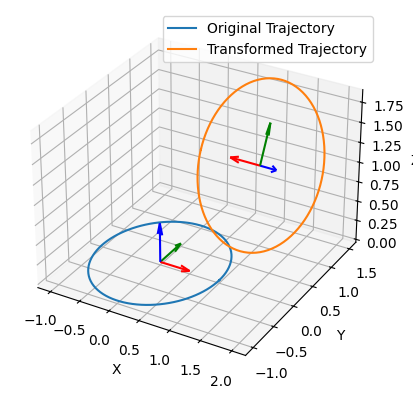

In [28]:
# Let's plot things
# Plot the original and transformed trajectories
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_trajectory(ax, original_trajectory, label='Original Trajectory')
plot_trajectory(ax, transformed_trajectory, label='Transformed Trajectory')

# Plot coordinate frames for both original and transformed frames
plot_frame(ax, np.eye(3))
plot_frame(ax, R, t)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

### Skew Symmetric Matrices

The **skew symmetric matrix** representation of a 3-D vector $\boldsymbol{v} = [v_1~v_2~v_3]^T$ is:

$\hat{\boldsymbol{v}} = [\boldsymbol{v}] = \boldsymbol{v}_{\times} = \begin{bmatrix}
    0 & -v_3 & v_2\\
    v_3 & 0 & -v_1\\
    -v_2 & v_1 & 0
\end{bmatrix}\in\mathbb{R}^{3\times 3}$

We can also have the **inverse** operator (called *vee*):

$\check{\boldsymbol{v}}_{\times} = [v_1~v_2~v_3]^T$

The skew symmetric matrix form a 3D vector can come handy. For example, we can use it compute the cross product of two 3D vectors:

$\boldsymbol{v}_1\times\boldsymbol{v}_2 = \hat{\boldsymbol{v}}_1\boldsymbol{v}_2$

Let's implement a few of those functions:

In [29]:
def hat(vec):
    v = vec.reshape((3,))
    ### TO-DO: Return the skew symmetric matrix representation
    ### ANSWER: Insert code here
    v_hat = np.array([[   0., -v[2],  v[1]],
                      [ v[2],    0., -v[0]],
                      [-v[1],  v[0],   0.]])
    return v_hat
    ### END of ANSWER

In [30]:
def unhat(mat):
    ### TO-DO: Return the vector from the skew symmetric matrix representation
    ### ANSWER: Insert code here
    v_unhat = np.zeros((3, 1))

    v_unhat[0] = mat[2, 1]
    v_unhat[1] = mat[0, 2]
    v_unhat[2] = mat[1, 0]

    return v_unhat
    ### END of ANSWER

### Angular Velocity and Rotation Matrices

**Angular velocity** is a 3D vector and is **a physical quantity**. In other words, **IT IS NOT** the derivative of any orientation representation! So let's see how the angular velocity is related to our rotation matrices.

$\dot{\boldsymbol{R}}_{wb} = \boldsymbol{R}_{wb}\hat{\boldsymbol{\omega}}_b$ *(angular velocity expressed in local frame)*

and

$\dot{\boldsymbol{R}}_{wb} = \hat{\boldsymbol{\omega}}_w\boldsymbol{R}_{wb}$ *(angular velocity expressed in world frame)*

Let's implement this!

In [31]:
def angular_velocity_to_deriv_rotation(omega_w, R):
    ### TO-DO: Implement angular velocity in world frame to derivative of rotation matrix
    ### ANSWER: Insert code here
    R_dot = hat(omega_w) @ R

    return R_dot
    ### END of ANSWER

def angular_velocity_local_to_deriv_rotation(omega_b, R):
    ### TO-DO: Implement angular velocity in world frame to derivative of rotation matrix
    ### ANSWER: Insert code here
    R_dot = R @ hat(omega_b)

    return R_dot
    ### END of ANSWER

# Some testing
R = RotX(1.)

omega_b = np.array([[1., 0., 0.]]).T

# Integrate naively for a few steps
dt = 0.1
R1 = np.copy(R)
R2 = np.copy(R)

for i in range(5):
    omega_w = R1 @ omega_b # rotate local omega to world frame
    R1d = angular_velocity_to_deriv_rotation(omega_w, R1)
    R2d = angular_velocity_local_to_deriv_rotation(omega_b, R2)

    R1 = R1 + R1d * dt # Euler integration!
    R2 = R2 + R2d * dt # Euler integration!

# These two should be very similar
print(R1)
print("========================")
print(R2)
print("========================")
print(np.linalg.norm(R1-R2))

[[ 1.    0.    0.  ]
 [ 0.    0.07 -1.02]
 [ 0.    1.02  0.07]]
[[ 1.    0.    0.  ]
 [ 0.    0.07 -1.02]
 [ 0.    1.02  0.07]]
0.0


### Time Derivatives of Transformation Matrices

The same holds for full transformation matrices:

$\boldsymbol{T}_{wb}^{-1}\dot{\boldsymbol{T}}_{wb} = [\mathcal{V}_b] = \begin{bmatrix} \hat{\boldsymbol{\omega}}_b & \boldsymbol{v}_b\\ 0 & 0 \end{bmatrix}$ *(body frame: Body Spatial Twist)*

and

$\dot{\boldsymbol{T}}_{wb}\boldsymbol{T}_{wb}^{-1} = [\mathcal{V}_w] = \begin{bmatrix} \hat{\boldsymbol{\omega}}_w & \boldsymbol{v}_w\\ 0 & 0 \end{bmatrix}$ *(world frame: World Spatial Twist)*

Let's implement/play with this as well.

In [32]:
def skew_velocity(V):
    ### TO-DO: Implement skew velocity operator. V is a 6x1 vector. The result should be stored in a variable named 'S'.
    ### ANSWER: Insert code here
    omega = V[:3].reshape((3,))
    v = V[3:].reshape((3,))
    omega_hat = hat(omega)
    
    S = np.zeros((4, 4))
    S[:3, :3] = omega_hat
    S[:3, 3] = v
    ### END of ANSWER

    return S

def spatial_velocity_to_deriv_homogeneous(Vw, T):
    ### TO-DO: Implement world spatial velocity transformation
    ### ANSWER: Insert code here
    T_dot = skew_velocity(Vw) @ T

    return T_dot
    ### END of ANSWER

def spatial_velocity_local_to_deriv_homogeneous(Vb, T):
    ### TO-DO: Implement body spatial velocity transformation
    ### ANSWER: Insert code here
    T_dot = T @ skew_velocity(Vb)

    return T_dot
    ### END of ANSWER

# Let's see if this is the same as pure Rotation kinematics
R = RotX(np.pi / 2.)

omega_b = np.array([[1., 0., 0.]]).T

T = homogeneous(R, np.zeros((3, 1)))

Vb = np.vstack([omega_b, np.zeros((3, 1))])

# Integrate naively for a few steps
dt = 0.1
T1 = np.copy(T)
T2 = np.copy(T)

for i in range(5):
    omega_w = T1[:3, :3] @ omega_b # rotate local omega to world frame
    Vw = np.vstack([omega_w, np.zeros((3, 1))])
    T1d = spatial_velocity_to_deriv_homogeneous(Vw, T1)
    T2d = spatial_velocity_local_to_deriv_homogeneous(Vb, T2)

    T1 = T1 + T1d * dt # Euler integration!
    T2 = T2 + T2d * dt # Euler integration!

# These two should be very similar
print(T1)
print("========================")
print(T2)
print("========================")
print(np.linalg.norm(T1-T2))

[[ 1.    0.    0.    0.  ]
 [ 0.   -0.49 -0.9   0.  ]
 [ 0.    0.9  -0.49  0.  ]
 [ 0.    0.    0.    1.  ]]
[[ 1.    0.    0.    0.  ]
 [ 0.   -0.49 -0.9   0.  ]
 [ 0.    0.9  -0.49  0.  ]
 [ 0.    0.    0.    1.  ]]
0.0
